# Prepare to run in kaggle

In [ ]:
!git clone https://BatyshchevKirill@github.com/BatyshchevKirill/text-detoxification.git
# !pip install -r /kaggle/working/text-detoxification/requirements.txt
!pip install contractions  # other packages from requirements are already present in the system of kaggle

In [1]:
import sys
import os

# Define your own path to the project
BASE_PATH = "/kaggle/working/text-detoxification/"
os.chdir(BASE_PATH)
sys.path.append(BASE_PATH)

# Prepare the data

In [3]:
from src.data.make_dataset import ToxicDataset, TransformerLoaderCreator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset = ToxicDataset('data/interim/preprocessed_data.csv', max_vocab_size=25000,
                      vocab_path='data/interim/vocab.pth', load_pretrained=False)

100%|██████████| 338647/338647 [01:56<00:00, 2916.76it/s]


In [ ]:
trainloader, valloader =  TransformerLoaderCreator(dataset, batch_size=64, max_len=128, random_state=33)()

In [ ]:
for i in trainloader:
    print(i[0].shape)
    break

torch.Size([128, 64])


# Prepare the model configurations

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
save_path = 'models/transformer_checkpoints/'
os.makedirs(save_path, exist_ok=True)
epochs = 25
lr = 3e-4
batch_size = 64
vocab_size = len(dataset.vocab)
emb_dim = 512
heads = 8
enc_layers = 3
dec_layers = 3
dropout = 0.1
max_len = 128
hidden_dim = 4

writer = SummaryWriter("runs/loss_plot")
step = 0

Create the model

In [ ]:
from src.models.transformer import Transformer

model = Transformer( emb_dim, vocab_size, heads, enc_layers, dec_layers, hidden_dim, dropout, max_len, device).to(device)

# Train the model

In [ ]:
from src.models.train_model import train_transformer

train_transformer(model, save_path, lr, epochs, trainloader, valloader)

Epoch 1/25


100%|██████████| 1059/1059 [01:24<00:00, 12.49it/s]


 Val_loss: 2.694975861746596
Epoch 2/25


100%|██████████| 1059/1059 [01:24<00:00, 12.48it/s]


 Val_loss: 2.446139826540456
Epoch 3/25


100%|██████████| 1059/1059 [01:24<00:00, 12.49it/s]


 Val_loss: 2.337929362053011
Epoch 4/25


100%|██████████| 1059/1059 [01:24<00:00, 12.51it/s]


 Val_loss: 2.268185344701448
Epoch 5/25


100%|██████████| 1059/1059 [01:24<00:00, 12.52it/s]


 Val_loss: 2.2306776932661436
Epoch 6/25


100%|██████████| 1059/1059 [01:24<00:00, 12.56it/s]


 Val_loss: 2.1940195270030425
Epoch 7/25


100%|██████████| 1059/1059 [01:24<00:00, 12.57it/s]


 Val_loss: 2.163613187580091
Epoch 8/25


100%|██████████| 1059/1059 [01:24<00:00, 12.57it/s]


 Val_loss: 2.1572248806246503
Epoch 9/25


100%|██████████| 1059/1059 [01:24<00:00, 12.52it/s]


 Val_loss: 2.1484621288193297
Epoch 10/25


100%|██████████| 1059/1059 [01:24<00:00, 12.50it/s]


 Val_loss: 2.141904162279945
Epoch 11/25


100%|██████████| 1059/1059 [01:24<00:00, 12.49it/s]


 Val_loss: 2.1422247554582734
Epoch 12/25


100%|██████████| 1059/1059 [01:24<00:00, 12.51it/s]


 Val_loss: 2.1400947280375884
Epoch 13/25


100%|██████████| 1059/1059 [01:24<00:00, 12.49it/s]


 Val_loss: 2.1384668602371577
Epoch 14/25


100%|██████████| 1059/1059 [01:24<00:00, 12.51it/s]


 Val_loss: 2.1411753564200615
Epoch 15/25


100%|██████████| 1059/1059 [01:24<00:00, 12.51it/s]


 Val_loss: 2.139150344166022
Epoch 16/25


100%|██████████| 1059/1059 [01:24<00:00, 12.56it/s]


 Val_loss: 2.1445019411748034
Epoch 17/25


100%|██████████| 1059/1059 [01:24<00:00, 12.51it/s]


 Val_loss: 2.1537813109198867
Epoch 18/25


100%|██████████| 1059/1059 [01:24<00:00, 12.51it/s]


 Val_loss: 2.158270135817379
Epoch 19/25


100%|██████████| 1059/1059 [01:24<00:00, 12.50it/s]


 Val_loss: 2.165378940566966
Epoch 20/25


100%|██████████| 1059/1059 [01:24<00:00, 12.50it/s]


 Val_loss: 2.1647329384476874
Epoch 21/25


100%|██████████| 1059/1059 [01:24<00:00, 12.50it/s]


 Val_loss: 2.1607240207697336
Epoch 22/25


100%|██████████| 1059/1059 [01:24<00:00, 12.56it/s]


 Val_loss: 2.170756859076935
Epoch 23/25


100%|██████████| 1059/1059 [01:24<00:00, 12.57it/s]


 Val_loss: 2.180449196254453
Epoch 24/25


100%|██████████| 1059/1059 [01:24<00:00, 12.51it/s]


 Val_loss: 2.1775310048525687
Epoch 25/25


100%|██████████| 1059/1059 [01:24<00:00, 12.57it/s]

 Val_loss: 2.1960019161388264


# Plot the loss graphs

In [2]:
from src.visualization.visualize import plot_loss

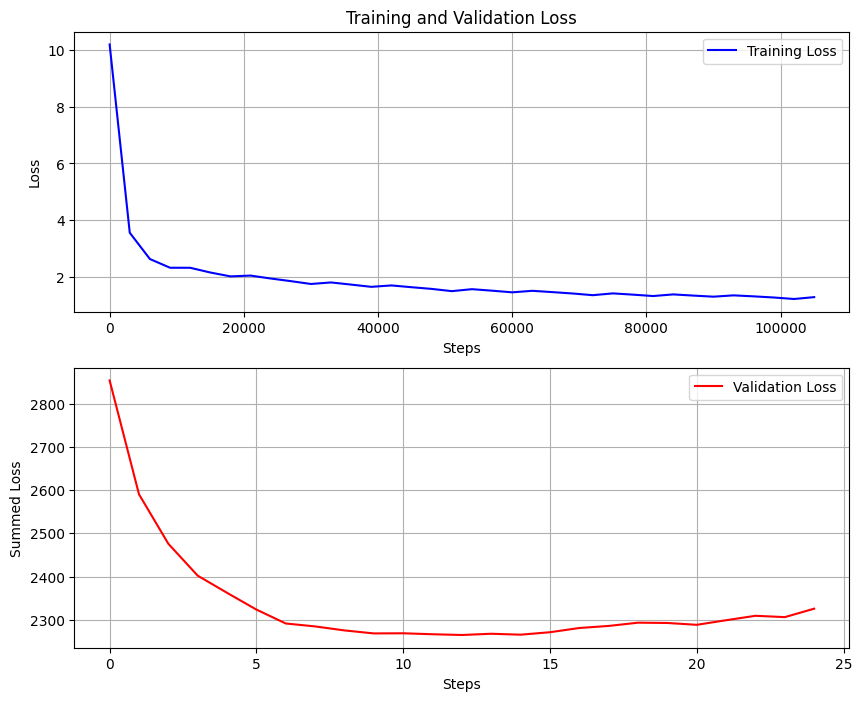

In [3]:
import os

files = os.listdir("runs/loss_plot")
plot_loss(f"runs/loss_plot/{files[1]}", step=30)

The model overfits after after approximately 10 epochs, it seems. However, the checkpoint saved includes the model that showed the best results on the validation set